In [1]:
from sklearn.datasets import load_boston
import matplotlib.pyplot as plt
import numpy as np  

In [2]:
data = load_boston()
X, y = data['data'], data['target']

In [3]:
X[1]  #X为二维数组

array([2.7310e-02, 0.0000e+00, 7.0700e+00, 0.0000e+00, 4.6900e-01,
       6.4210e+00, 7.8900e+01, 4.9671e+00, 2.0000e+00, 2.4200e+02,
       1.7800e+01, 3.9690e+02, 9.1400e+00])

In [4]:
x = np.array([[1,2,3],[5,6,7],[8,9,10]]) 
# 在list中的数据类型保存的是数据的存放的地址，
# 简单的说就是指针，并非数据，例如list1=[1,2,3,'a']需要4个指针和四个数据，增加了存储和消耗cpu。
# 一个numpy array 是内存中一个连续块，并且array里的元素都是同一类（例如整数）。
# 所以一旦确定了一个array，它的内存就确定了，那么每个元素（整数）的内存大小都确定了（4 bytes）。

In [5]:
len(X[:,0])  # X所有行的第0个元素

506

In [6]:
len(y)

506

In [7]:
%matplotlib inline

In [8]:
def draw_rm_and_price():
    plt.scatter(X[:, 5], y)

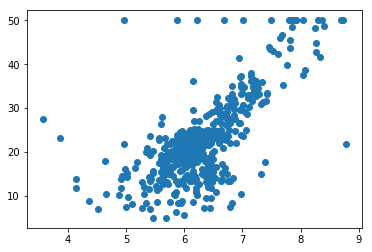

In [9]:
draw_rm_and_price()

In [10]:
import random

In [11]:
def price(rm, k, b):
    """f(x) = k * x + b"""
    return k * rm + b

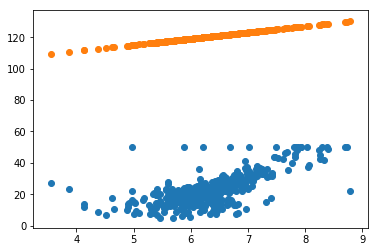

In [12]:
X_rm = X[:, 5]
k = random.randint(-100, 100)
b = random.randint(-100, 100)
price_by_random_k_and_b = [price(r, k, b) for r in X_rm]

draw_rm_and_price()
plt.scatter(X_rm, price_by_random_k_and_b)

In [13]:
def loss(y, y_hat): # to evaluate the performance 
    return sum(abs(y_i - y_hat_i) for y_i, y_hat_i in zip(list(y), list(y_hat))) / len(list(y))

In [14]:
trying_times = 20000

min_loss = float('inf')

best_k = random.random() * 200 - 100
best_b = random.random() * 200 - 100

direction = [
    (+1, -1),  # first element: k's change direction, second element: b's change direction
    (+1, +1), 
    (-1, -1), 
    (-1, +1),
]

next_direction = random.choice(direction)

scalar = 0.1

for i in range(trying_times):
    
    k_direction, b_direction = next_direction
    
    current_k, current_b = best_k + k_direction * scalar, best_b + b_direction * scalar
    
    price_by_k_and_b = [price(r, current_k, current_b) for r in X_rm]

    current_loss = loss(y, price_by_k_and_b)
    
    if current_loss < min_loss: # performance became better
        min_loss = current_loss
        best_k, best_b = current_k, current_b
        
        next_direction = next_direction
        print('When time is : {}, get best_k: {} best_b: {}, and the loss is: {}'.format(i, best_k, best_b, min_loss))
    else:
        next_direction = random.choice(direction)

When time is : 0, get best_k: 22.10386829495284 best_b: -63.34667541994722, and the loss is: 53.10119639800099
When time is : 1, get best_k: 22.003868294952838 best_b: -63.44667541994722, and the loss is: 52.37881754424605
When time is : 2, get best_k: 21.903868294952836 best_b: -63.54667541994722, and the loss is: 51.65643869049111
When time is : 3, get best_k: 21.803868294952835 best_b: -63.64667541994722, and the loss is: 50.93405983673617
When time is : 4, get best_k: 21.703868294952834 best_b: -63.74667541994722, and the loss is: 50.21168098298119
When time is : 5, get best_k: 21.603868294952832 best_b: -63.846675419947225, and the loss is: 49.48930212922628
When time is : 6, get best_k: 21.50386829495283 best_b: -63.946675419947226, and the loss is: 48.766923275471285
When time is : 7, get best_k: 21.40386829495283 best_b: -64.04667541994722, and the loss is: 48.04454442171632
When time is : 8, get best_k: 21.303868294952828 best_b: -64.14667541994721, and the loss is: 47.3221655

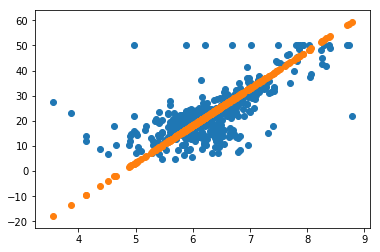

In [15]:
X_rm = X[:, 5]
k = 14.803868294952757
b = -70.64667541994685
price_by_random_k_and_b = [price(r, k, b) for r in X_rm]

draw_rm_and_price()
plt.scatter(X_rm, price_by_random_k_and_b)